### Analyse du dataset :


In [1]:
# 1-charge du dataset:
import pandas as pd 
data = pd.read_csv('data.csv')
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [2]:
# 2-affichage des 5 premieres lignes:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
# 3-dimention du dataset:
data.shape

(1000, 9)

In [4]:
# 4-liste des colonnes:
data.columns.to_list()

['Order_ID',
 'Distance_km',
 'Weather',
 'Traffic_Level',
 'Time_of_Day',
 'Vehicle_Type',
 'Preparation_Time_min',
 'Courier_Experience_yrs',
 'Delivery_Time_min']

In [5]:
# 5-types de donnees:
data.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [6]:
# 6-les valeurs manquantes:
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [7]:
# 7-information general: 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
# les 8-statestiques descriptives:
data.describe()


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### visualisation :

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


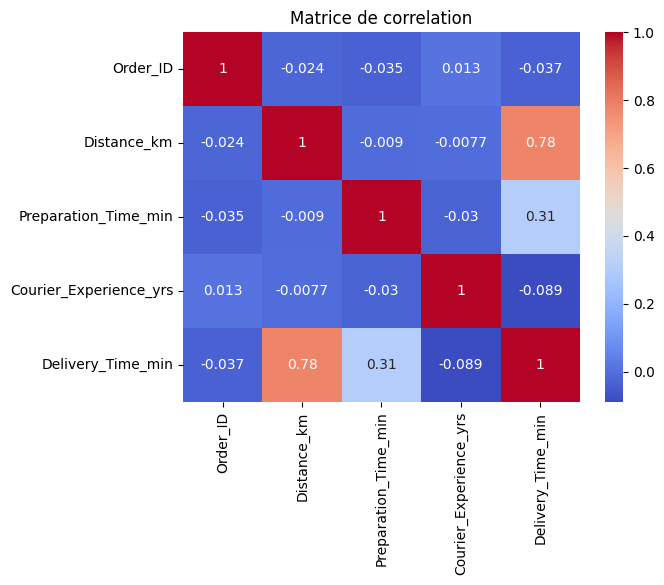

In [10]:
# 1- correlation des variables numeriques:
numColumns = ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
mean = data['Courier_Experience_yrs'].mean()
data['Courier_Experience_yrs'] = data['Courier_Experience_yrs'].fillna(mean)
corr = data[numColumns].corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm")
plt.title('Matrice de correlation')
plt.show()








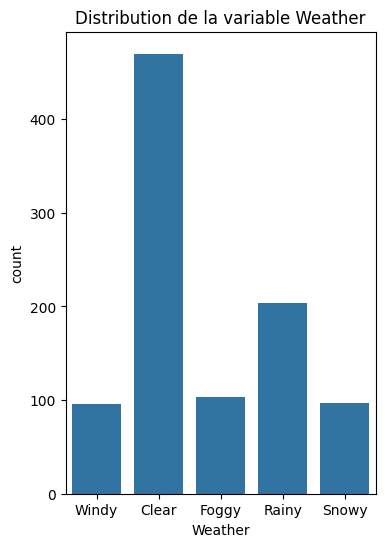

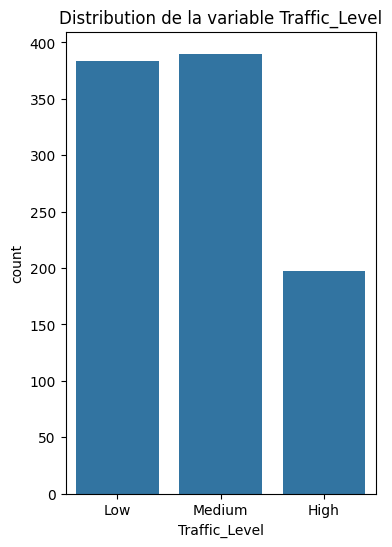

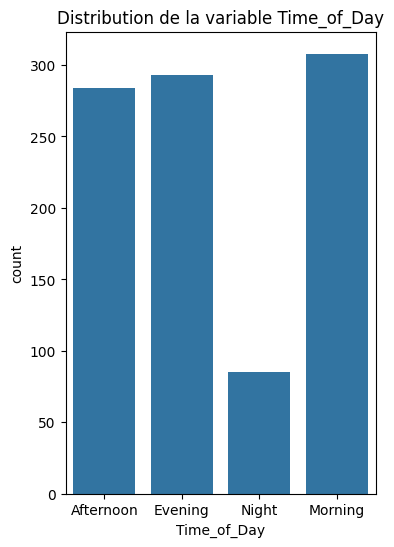

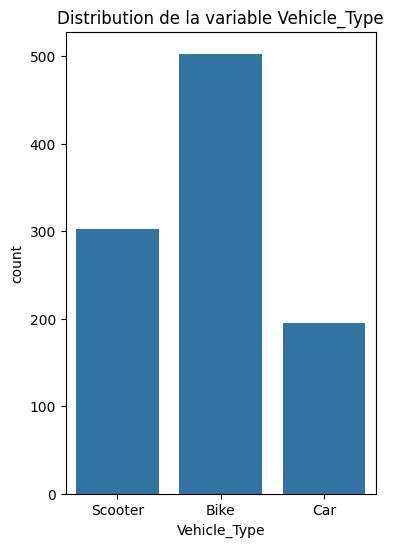

In [11]:
# 2-création de countplots pour les variables catégorielles par rapport à 'Delivery_Time_min':
caColumns = data.drop(columns=numColumns).columns
caColumns
for col in caColumns:
    plt.figure(figsize=(4,6))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution de la variable {col}")
    # sns.barplot(data=data, x=col, y='Delivery_Time_min', estimator='mean')
    # plt.title(f"Temps moyen de livraison selon {col}")
    # plt.show()





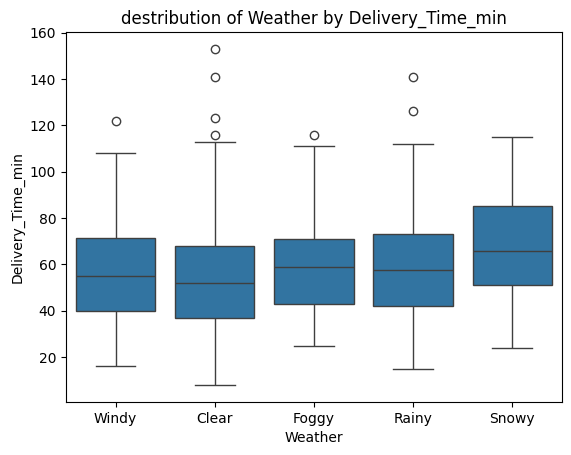

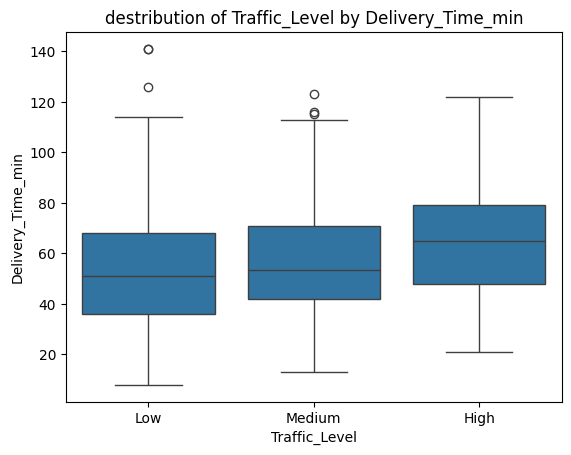

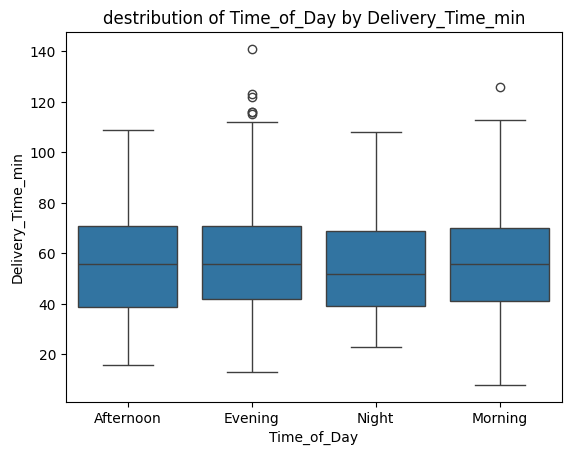

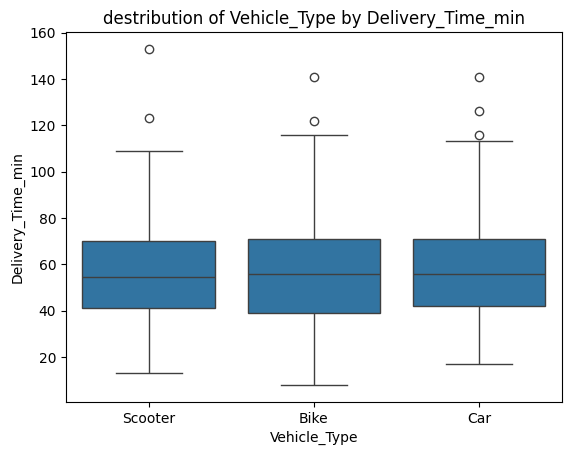

In [12]:
# 3-analyser la relation entre la cible et les variables catégorielles (Boxplot):
for col in caColumns:
    sns.boxplot(data=data, x=col, y='Delivery_Time_min')
    plt.title(f"destribution of {col} by Delivery_Time_min")
    plt.show()

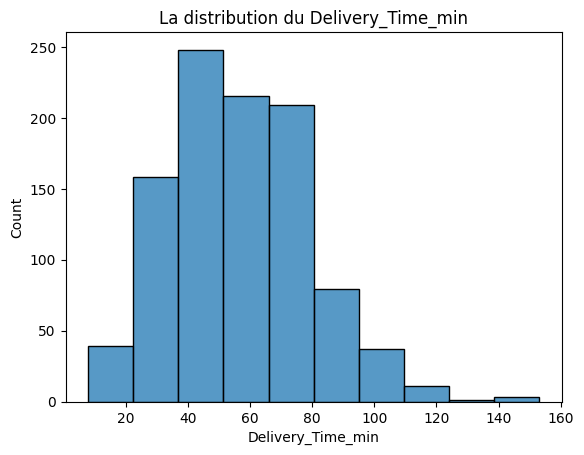

In [18]:
# 4- Analyse de la distribution de la variable cible:
sns.histplot(data['Delivery_Time_min'], bins=10)
plt.title('La distribution du Delivery_Time_min')
plt.xlabel('Delivery_Time_min')
plt.show()


### Modelisation :

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

In [ ]:
from pipeline import charge_donnes, pretraitement_donnes, split_features, split_data, selectKBest_features, normalized_data

data = charge_donnes()
clean_data = pre




